In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


In [ ]:
i = pd.read_csv(r'C:\Users\lenovo\Downloads\Cricket.csv', sep = ',', encoding = "ISO-8859-1", header = 0)

In [ ]:
i.shape

(79, 13)

In [ ]:
i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
Player    79 non-null object
Span      79 non-null object
Mat       79 non-null int64
Inns      79 non-null int64
NO        79 non-null int64
Runs      79 non-null int64
HS        79 non-null object
Ave       79 non-null float64
BF        79 non-null int64
SR        79 non-null float64
100       79 non-null int64
50        79 non-null int64
0         79 non-null int64
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


In [ ]:
i.isna().mean().round()*100

Player    0.0
Span      0.0
Mat       0.0
Inns      0.0
NO        0.0
Runs      0.0
HS        0.0
Ave       0.0
BF        0.0
SR        0.0
100       0.0
50        0.0
0         0.0
dtype: float64

In [ ]:
col = ['Ave', 'SR']
i = i[col].astype(float)

In [ ]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

i = standard_scaler.fit_transform(i)
i = pd.DataFrame(i)

In [ ]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1*n)
    nbrs = NearestNeighbors(n_neighbors = 1).fit(X.values)
    
    rand_X = sample(range(0,n,1),m)
    
    ujd = []
    wjd = []
    for j in range(0,m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amax(X, axis = 0),d).reshape(1, -1), 2, return_distance = True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance = True)
        wjd.append(w_dist[0][1])
    H = sum(ujd) / (sum(ujd)+ sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H-8
    return H

In [ ]:
hopkins(i)

0.8945155836094004

In [ ]:
clus5 = KMeans(n_clusters = 5, max_iter = 50)
clus5.fit(i)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2,15):
    kmeans = KMeans(n_clusters = k, random_state = 100).fit(i)
    sse_.append([k, silhouette_score(i, kmeans.labels_)])

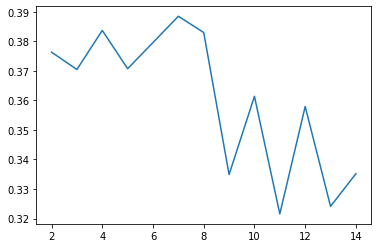

In [ ]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])

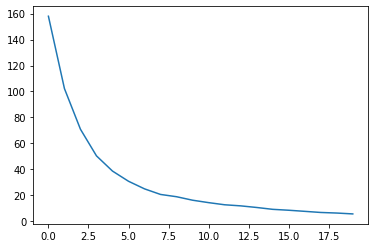

In [ ]:
#sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter = 50)
    model_clus.fit(i)
    ssd.append(model_clus.inertia_)
    
plt.plot(ssd)